In [2]:
import re

import requests 

from bs4 import BeautifulSoup as bs

import pandas as pd

In [401]:
def removeAccents(input_text):

    strange='ŮôῡΒძěἊἦëĐᾇόἶἧзвŅῑἼźἓŉἐÿἈΌἢὶЁϋυŕŽŎŃğûλВὦėἜŤŨîᾪĝžἙâᾣÚκὔჯᾏᾢĠфĞὝŲŊŁČῐЙῤŌὭŏყἀхῦЧĎὍОуνἱῺèᾒῘᾘὨШūლἚύсÁóĒἍŷöὄЗὤἥბĔõὅῥŋБщἝξĢюᾫაπჟῸდΓÕűřἅгἰშΨńģὌΥÒᾬÏἴქὀῖὣᾙῶŠὟὁἵÖἕΕῨčᾈķЭτἻůᾕἫжΩᾶŇᾁἣჩαἄἹΖеУŹἃἠᾞåᾄГΠКíōĪὮϊὂᾱიżŦИὙἮὖÛĮἳφᾖἋΎΰῩŚἷРῈĲἁéὃσňİΙῠΚĸὛΪᾝᾯψÄᾭêὠÀღЫĩĈμΆᾌἨÑἑïოĵÃŒŸζჭᾼőΣŻçųøΤΑËņĭῙŘАдὗპŰἤცᾓήἯΐÎეὊὼΘЖᾜὢĚἩħĂыῳὧďТΗἺĬὰὡὬὫÇЩᾧñῢĻᾅÆßшδòÂчῌᾃΉᾑΦÍīМƒÜἒĴἿťᾴĶÊΊȘῃΟúχΔὋŴćŔῴῆЦЮΝΛῪŢὯнῬũãáἽĕᾗნᾳἆᾥйᾡὒსᾎĆрĀüСὕÅýფᾺῲšŵкἎἇὑЛვёἂΏθĘэᾋΧĉᾐĤὐὴιăąäὺÈФĺῇἘſგŜæῼῄĊἏØÉПяწДĿᾮἭĜХῂᾦωთĦлðὩზკίᾂᾆἪпἸиᾠώᾀŪāоÙἉἾρаđἌΞļÔβĖÝᾔĨНŀęᾤÓцЕĽŞὈÞუтΈέıàᾍἛśìŶŬȚĳῧῊᾟάεŖᾨᾉςΡმᾊᾸįᾚὥηᾛġÐὓłγľмþᾹἲἔбċῗჰხοἬŗŐἡὲῷῚΫŭᾩὸùᾷĹēრЯĄὉὪῒᾲΜᾰÌœĥტ'

 
    ascii_replacements='UoyBdeAieDaoiiZVNiIzeneyAOiiEyyrZONgulVoeETUiOgzEaoUkyjAoGFGYUNLCiIrOOoqaKyCDOOUniOeiIIOSulEySAoEAyooZoibEoornBSEkGYOapzOdGOuraGisPngOYOOIikoioIoSYoiOeEYcAkEtIuiIZOaNaicaaIZEUZaiIaaGPKioIOioaizTIYIyUIifiAYyYSiREIaeosnIIyKkYIIOpAOeoAgYiCmAAINeiojAOYzcAoSZcuoTAEniIRADypUitiiIiIeOoTZIoEIhAYoodTIIIaoOOCSonyKaAsSdoACIaIiFIiMfUeJItaKEISiOuxDOWcRoiTYNLYTONRuaaIeinaaoIoysACRAuSyAypAoswKAayLvEaOtEEAXciHyiiaaayEFliEsgSaOiCAOEPYtDKOIGKiootHLdOzkiaaIPIIooaUaOUAIrAdAKlObEYiINleoOTEKSOTuTEeiaAEsiYUTiyIIaeROAsRmAAiIoiIgDylglMtAieBcihkoIrOieoIYuOouaKerYAOOiaMaIoht'


    translator=str.maketrans(strange,ascii_replacements)
    
    
    return input_text.translate(translator)


In [411]:
url = 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-kujawsko-pomorskie'

In [412]:
def get_names_list(url):
    
    page = requests.get(url)

    psoup = bs(page.content,'html.parser')

    paragraph = psoup.article.div.p

    paragraph = re.sub("<p>|</p>|<br/>","",str(paragraph))

    paragraph = paragraph.split('\n')

    data = pd.DataFrame([x.split('-') for x in paragraph])

    data.columns = ['imie', 'liczba']

    data['liczba'] = data['liczba'].astype('int')

    url_match = re.match('.*/najpopularniejsze-imiona-dla-(.*)-2018-woj-(.*)',url)

    data['plec'] = url_match.group(1)
    data['wojewodztwo'] = url_match.group(2)
    data['imie'] = data['imie'].str.capitalize()
    data['plec'] = ['dziewczyna' if x[0] == 'd' else 'chlopiec' for x in data['plec']]
    
    return data

In [473]:
links_page = requests.get('https://www.gov.pl/web/cyfryzacja/imiona')

content = links_page.content

soup = bs(content,'html.parser')

text_href = re.findall(r'href.*', str(soup.article))
text_href = re.sub("'href=|</a>","", str(text_href))

text_href_tab = []

for x in text_href.split(','):
    text_href_tab.append(re.findall('>.*',x)[0][1:-1])
    #print(re.findall('>.*\D+',x)[0][1:-1])
    
text_href_tab = [x for x in text_href_tab if re.search('</li>',x) ==  None]
text_href_tab = ['https://www.gov.pl/web/cyfryzacja/'+x.lower() for x in text_href_tab]
text_href_tab = [re.sub(' ','-',x) for x in text_href_tab]
text_href_tab = [re.sub('---','-',x) for x in text_href_tab]
text_href_tab = [re.sub('\.-','-',x) for x in text_href_tab]
text_href_tab = [removeAccents(x) for x in text_href_tab]
text_href_tab = [x for x in text_href_tab if re.search('ogolnopolski',x) == None]

text_href_tab

['https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-dolnoslaskie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-kujawsko-pomorskie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-lubelskie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-lubuskie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-lodzkie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-malopolskie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-mazowieckie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-opolskie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-podkarpackie',
 'https://www.gov.pl/web/cyfryzacja/najpopularniejsze-imiona-dla-dziewczynek-2018-woj-podlaskie',
 'htt

In [478]:
names = pd.DataFrame()

for x in range(len(text_href_tab)):
    tmp = get_names_list(text_href_tab[x])
    names = names.append(tmp)


In [481]:
most_popular_girls_names = names[names['plec'] == 'dziewczyna'].groupby ('imie').sum().sort_values('liczba',ascending=False).reset_index()
most_popular_boys_names = names[names['plec'] == 'chlopiec'].groupby('imie').sum().sort_values('liczba',ascending=False).reset_index()
most_popular_girls_names.head(10)

,imie,liczba
0,Zuzanna,8862
1,Julia,8463
2,Maja,8027
3,Zofia,7928
4,Hanna,7718
5,Lena,7647
6,Alicja,5757
7,Maria,5440
8,Amelia,5309
9,Oliwia,5057


In [487]:
children_by_province = names.groupby(['wojewodztwo','plec']).sum().reset_index()
children_by_province.head()

,wojewodztwo,plec,liczba
0,dolnoslaskie,chlopiec,14575
1,dolnoslaskie,dziewczyna,13708
2,kujawsko-pomorskie,chlopiec,10761
3,kujawsko-pomorskie,dziewczyna,10007
4,lodzkie,chlopiec,12013


In [535]:
names_province = pd.merge(names,children_by_province,on=['wojewodztwo','plec'])
names_province['percent'] = 100*names_province['liczba_x']/names_province['liczba_y']
most_popular_names_province = names_province.loc[names_province.groupby(['plec','wojewodztwo'])['percent'].idxmax()
                                                 ,['wojewodztwo','plec','imie','percent']]
name_popularity= names_province[names_province.imie == 'Olga ']

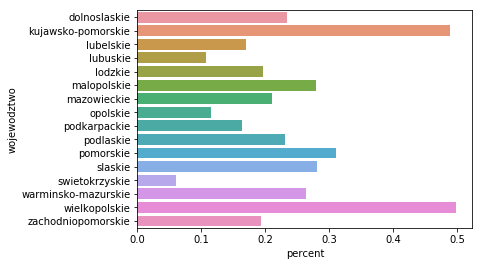

In [536]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x ='percent',y = 'wojewodztwo',data=name_popularity)
plt.show()
